## **Credit Card Fraud Detection**

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Loading Dataset

European Cardholders Credit Card Fraud Dataset (Kaggle)

Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [ ]:
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27819 entries, 0 to 27818
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27819 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27818 non-null  float64
 4   V4      27818 non-null  float64
 5   V5      27818 non-null  float64
 6   V6      27818 non-null  float64
 7   V7      27818 non-null  float64
 8   V8      27818 non-null  float64
 9   V9      27818 non-null  float64
 10  V10     27818 non-null  float64
 11  V11     27818 non-null  float64
 12  V12     27818 non-null  float64
 13  V13     27818 non-null  float64
 14  V14     27818 non-null  float64
 15  V15     27818 non-null  float64
 16  V16     27818 non-null  float64
 17  V17     27818 non-null  float64
 18  V18     27818 non-null  float64
 19  V19     27818 non-null  float64
 20  V20     27818 non-null  float64
 21  V21     27818 non-null  float64
 22

In [ ]:
df['Class'].value_counts()

,count
Class,
0.0,27725
1.0,93


Class 0 → Genuine transactions

Class 1 → Fraudulent transactions

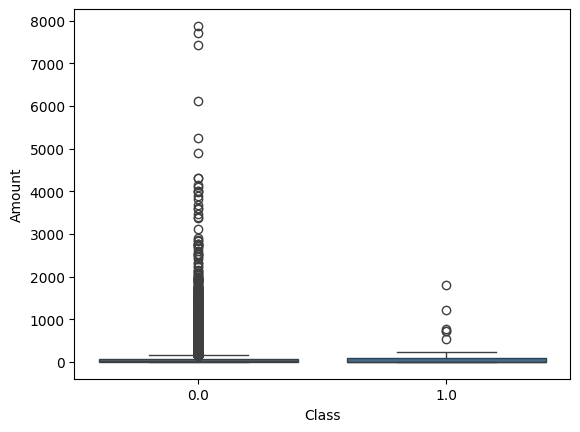

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.show()

The boxplot shows that fraudulent transactions generally have higher median amounts with less extreme outliers, while genuine transactions include rare but very high-value outliers, indicating that transaction amount alone is insufficient for fraud detection.

# Data cleaning

In [ ]:
df.isnull().sum()

,0
Time,0
V1,1
V2,1
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [ ]:
df.dropna(inplace=True)

# Feature Engineering

In [ ]:
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df.drop(['Amount'], axis=1, inplace=True)

Amount scaled to mean to standardize data as amount was very much variant

# Train-Test split

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Decision tree Model

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Model evaluation

In [ ]:
y_pred = dt.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5541    4]
 [   5   14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5545
         1.0       0.78      0.74      0.76        19

    accuracy                           1.00      5564
   macro avg       0.89      0.87      0.88      5564
weighted avg       1.00      1.00      1.00      5564



# Regularization and hyper parameter tuning

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [50, 100],
    'min_samples_leaf': [20, 50]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring='recall',
    cv=3
)

grid.fit(X_train, y_train)
best_dt = grid.best_estimator_

# New Metrics

In [ ]:
y_pred_tuned = best_dt.predict(X_test)

print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

[[5537    8]
 [   5   14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5545
         1.0       0.64      0.74      0.68        19

    accuracy                           1.00      5564
   macro avg       0.82      0.87      0.84      5564
weighted avg       1.00      1.00      1.00      5564



# Interpretation

In [ ]:
importance = pd.Series(
    best_dt.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.head(10)

,0
V12,0.975905
V14,0.022288
V16,0.001807
V3,0.000000
V2,0.000000
Time,0.000000
V5,0.000000
V6,0.000000
V8,0.000000
V7,0.000000


# Decision Tree Visualization

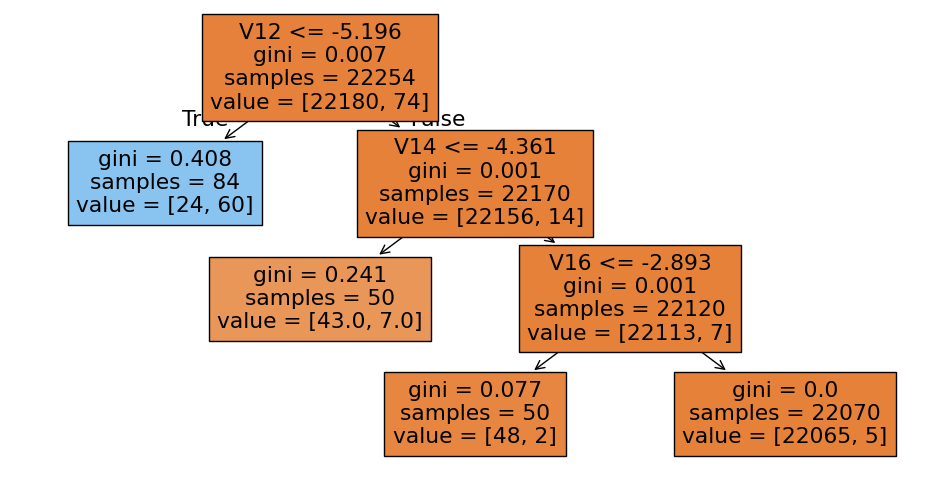

In [ ]:
plt.figure(figsize=(12,6))
plot_tree(best_dt, max_depth=3, feature_names=X.columns, filled=True)
plt.show()